# **Exploratory Data Analysis**

In [110]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
# Load the datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [112]:
# Convert date columns to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [113]:
customers.isnull().sum()
products.isnull().sum()
transactions.isnull().sum()


TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

In [114]:
customers.duplicated().sum()
products.duplicated().sum()
transactions.duplicated().sum()

0

In [115]:
print("Customers DataFrame Summary:")
print(customers.describe())
print(customers.info())
print(customers['Region'].value_counts())

Customers DataFrame Summary:
                SignupDate
count                  200
mean   2023-07-19 08:31:12
min    2022-01-22 00:00:00
25%    2022-09-26 12:00:00
50%    2023-08-31 12:00:00
75%    2024-04-12 12:00:00
max    2024-12-28 00:00:00
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    object        
 3   SignupDate    200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 6.4+ KB
None
Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


In [116]:
print("Products DataFrame Summary:")
print(products.describe())
print(products.info())
print(products['Category'].value_counts())

Products DataFrame Summary:
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64


In [117]:
print("Transactions DataFrame Summary:")
print(transactions.describe())
print(transactions.info())

Transactions DataFrame Summary:
                     TransactionDate     Quantity   TotalValue       Price
count                           1000  1000.000000  1000.000000  1000.00000
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000
max              2024-12-28 11:00:00     4.000000  1991.040000   497.76000
std                              NaN     1.117981   493.144478   140.73639
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 no

In [118]:
# Merge datasets
merged_df = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

# Basic EDA on merged data
print("Merged DataFrame Summary:")
print(merged_df.describe())
print(merged_df.info())

Merged DataFrame Summary:
                     TransactionDate     Quantity   TotalValue     Price_x  \
count                           1000  1000.000000  1000.000000  1000.00000   
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407   
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000   
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000   
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000   
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000   
max              2024-12-28 11:00:00     4.000000  1991.040000   497.76000   
std                              NaN     1.117981   493.144478   140.73639   

                          SignupDate     Price_y  
count                           1000  1000.00000  
mean   2023-07-09 02:49:55.199999744   272.55407  
min              2022-01-22 00:00:00    16.08000  
25%              2022-09-17 12:00:00   147.95000  
50%             

## **Visualizations**

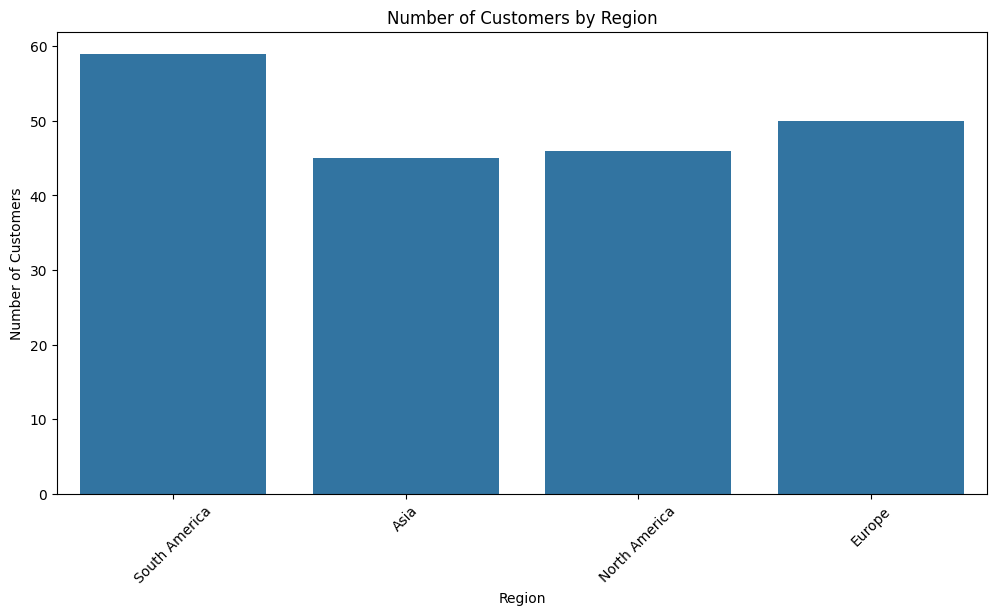

In [119]:

# Customers by Region
plt.figure(figsize=(12, 6))
sns.countplot(data=customers, x='Region')
plt.title('Number of Customers by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

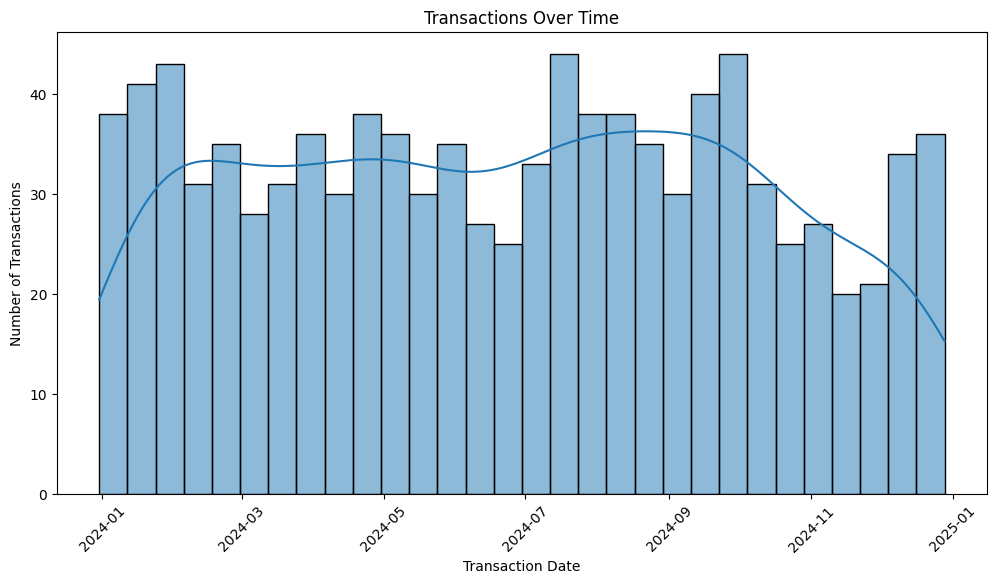

In [120]:
# Transactions over time
plt.figure(figsize=(12, 6))
sns.histplot(transactions['TransactionDate'], bins=30, kde=True)
plt.title('Transactions Over Time')
plt.xlabel('Transaction Date')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

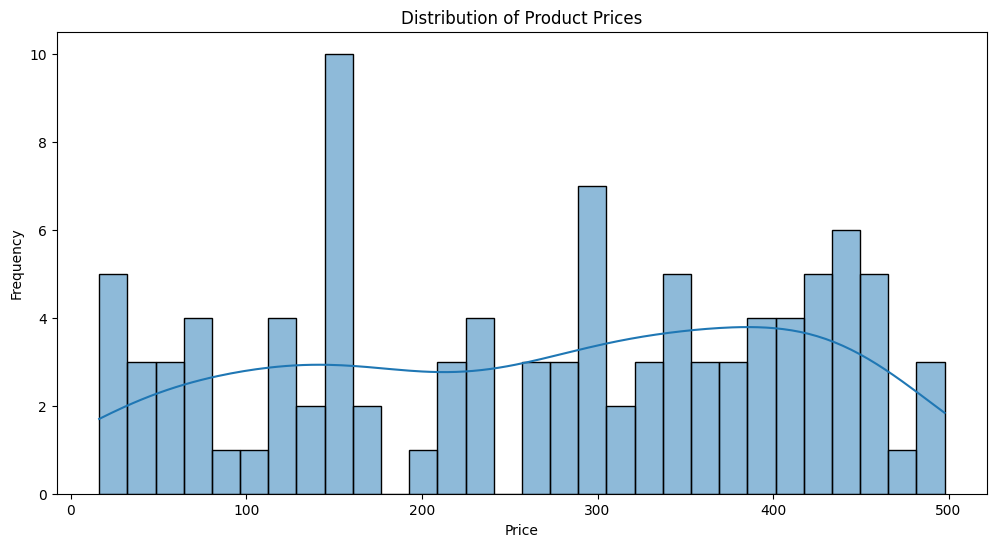

In [121]:
# Distribution of Product Prices
plt.figure(figsize=(12, 6))
sns.histplot(products['Price'], bins=30, kde=True)
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

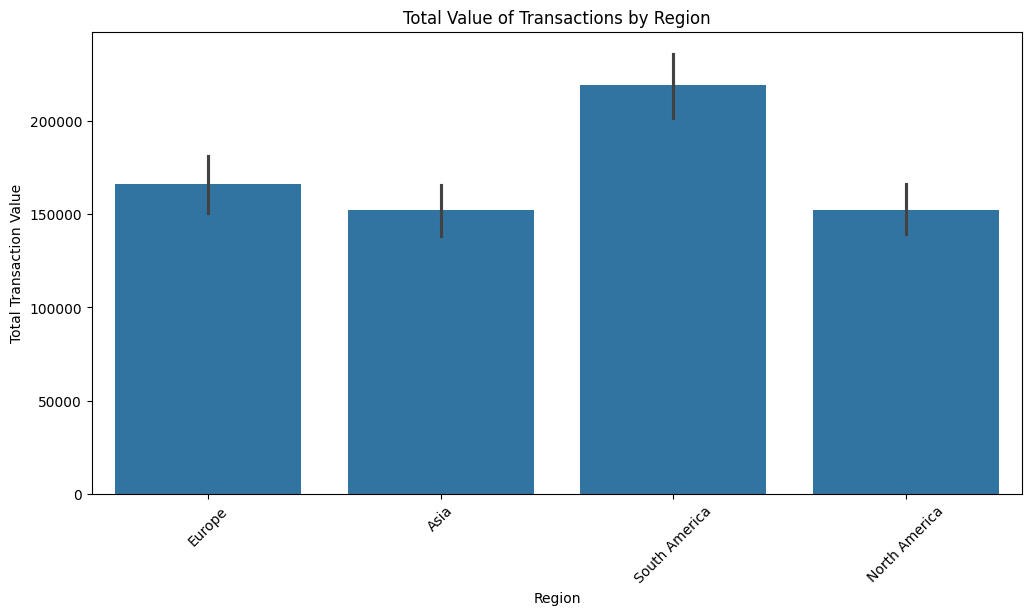

In [122]:
# Total Value of Transactions by Region
plt.figure(figsize=(12, 6))
sns.barplot(data=merged_df, x='Region', y='TotalValue', estimator=sum)
plt.title('Total Value of Transactions by Region')
plt.xlabel('Region')
plt.ylabel('Total Transaction Value')
plt.xticks(rotation=45)
plt.show()

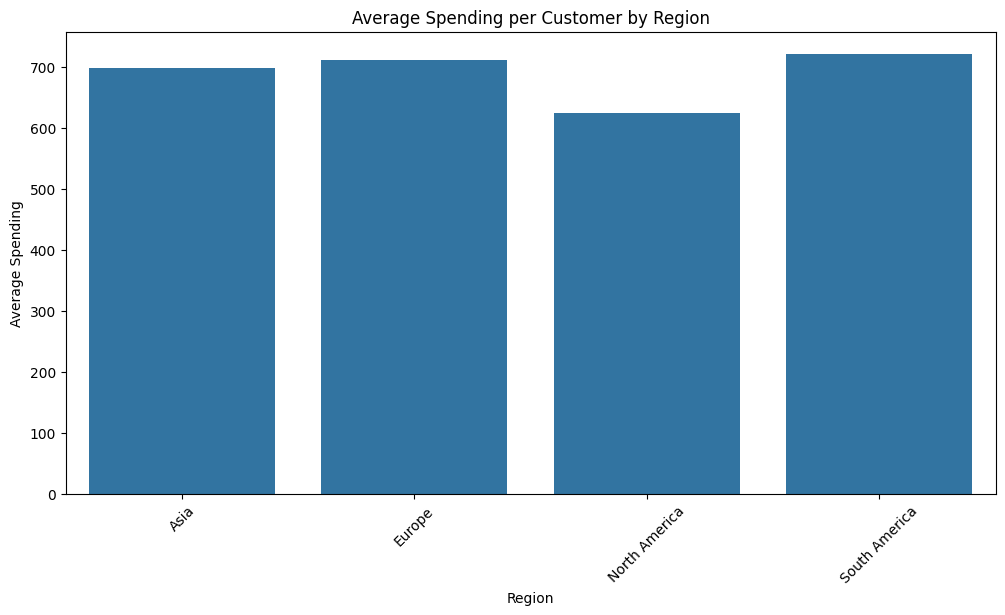

In [123]:
# Average Spending per Customer by Region
avg_spending = merged_df.groupby('Region')['TotalValue'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_spending, x='Region', y='TotalValue')
plt.title('Average Spending per Customer by Region')
plt.xlabel('Region')
plt.ylabel('Average Spending')
plt.xticks(rotation=45)
plt.show() 